In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

C:\Users\Shlok Sonkusare\AppData\Local\Temp\ipykernel_14260\185734675.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


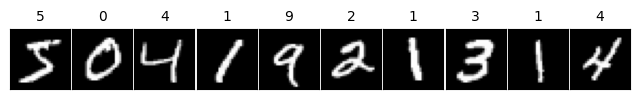

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(8, 5), gridspec_kw={'wspace': 0.04, 'hspace': 0.01}, squeeze=True)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(str(y_train[i]), fontsize=10)

plt.tight_layout()
plt.show()

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [5]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [6]:
datagen = ImageDataGenerator(rescale=1./255) 
history = model.fit(datagen.flow(x_train, y_train, batch_size=100), epochs=5, 
                    validation_data=(x_test, y_test))

Epoch 1/5
600/600 [==============================] - 38s 59ms/step - loss: 2.3017 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.1119 - val_loss: 2.2930 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.1135
Epoch 2/5
600/600 [==============================] - 56s 93ms/step - loss: 2.3014 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.1124 - val_loss: 2.2937 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.1135
Epoch 3/5
600/600 [==============================] - 35s 59ms/step - loss: 2.3014 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.1124 - val_loss: 2.2937 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.1135
Epoch 4/5
600/600 [==============================] - 37s 62ms/step - loss: 2.3014 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.1124 - val_loss: 2.2944 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.1135
Epoch 5/5
600/600 [=================

In [8]:
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 4s 12ms/step


In [9]:
loss, precision, recall, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Loss function value:", loss)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Loss function value: 2.2941930294036865
Accuracy: 0.11349999904632568
Precision: 0.0
Recall: 0.0


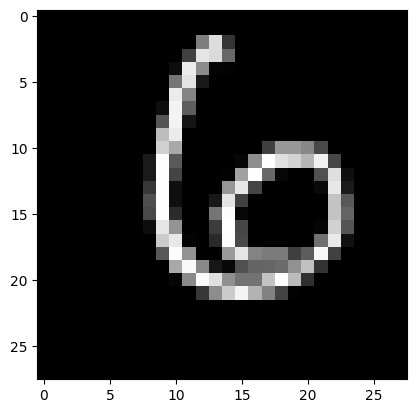

In [10]:
value = 100

test_image = x_test[value]
plt.imshow(test_image.reshape(28, 28, 1), cmap='gray')

In [11]:
test_data = x_test[value].reshape(1, 28, 28, 1)
pred = model.predict(test_data)
pred

1/1 [==============================] - 0s 8ms/step


array([[0.10055859, 0.11824908, 0.10140678, 0.10338458, 0.09497209,
        0.08111174, 0.09782033, 0.10819966, 0.09441253, 0.09988461]],
      dtype=float32)

In [12]:
class_value = np.argmax(pred)
class_value

1

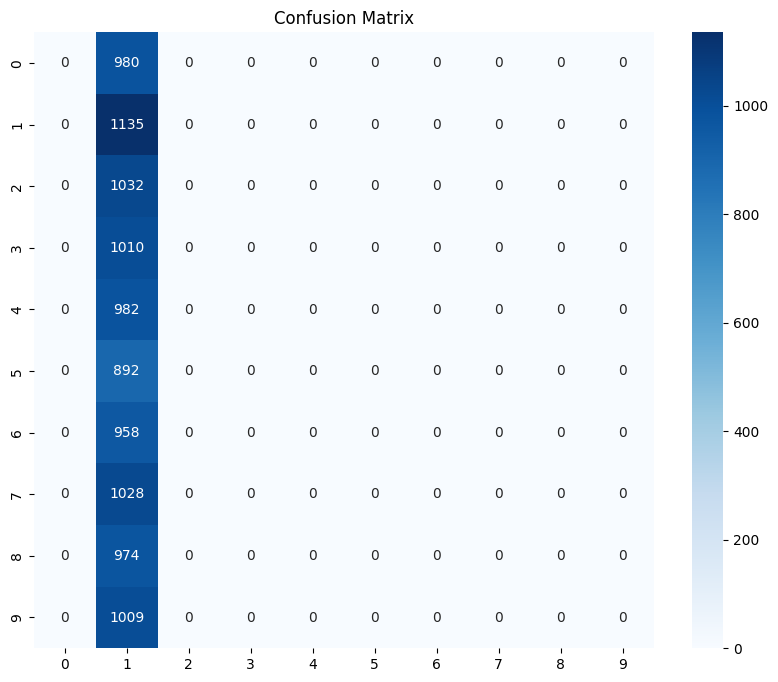

In [13]:
y_pred_labels = y_pred_class
y_test_labels = np.argmax(y_test, axis=1)
matrix = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, cmap='Blues', annot=True, fmt='d', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.show()

In [18]:
class_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
report = classification_report(y_true, y_pred_class, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



c:\Users\Shlok Sonkusare\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shlok Sonkusare\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shlok Sonkusare\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh